<a href="https://colab.research.google.com/github/RayWright27/SystemC-CNN-test-model/blob/clocked/MNIST_CNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка софта, импорт библиотек

In [ ]:

#устанавливаем софт
! pip install -U pip  
! pip install tensorflow 
! apt update 
! apt install python-dev 
! pip install keras


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
#устанвилваем датасеты
!pip install -U tensorflow_hub
!pip install -U tensorflow_datasets
#fixed-point
!pip install fxpmath

In [ ]:
#импортим библиотеки в питон
import time
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
#tfds.disable_progress_bar() #а надо ли дизейблить?
from tensorflow.keras import layers
import keras 
from keras import backend as K

#для keract (доп)
#from tensorflow.python.framework.ops import disable_eager_execution
#disable_eager_execution()

In [ ]:
#скачали реп с гитхаба той готовой модели для MNIST
!git clone https://github.com/EN10/KerasMNIST.git

fatal: destination path 'KerasMNIST' already exists and is not an empty directory.


# Подготовка и ввод исходного изображения

In [ ]:
#scipy нужной версии для ресайза и прочей подготовки пикчи с цифрой
! pip install scipy==1.1.0
! pip install pillow
from scipy.misc import imread, imresize

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  """


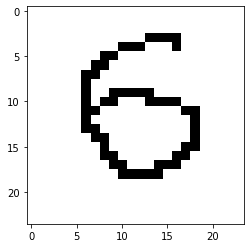

In [ ]:
x = imread('/content/mytest.png',mode='L')
#compute a bit-wise inversion so black becomes white and vice versa
x = np.invert(x)
#make it the right size
x = imresize(x,(28,28))
x = x.astype('float32')
x /= 255
#экспорт картинки в виде массива
np.savetxt('image.txt',x, fmt='%10.10f', delimiter=',', newline=',\n')
#x = x.astype('bool')
#np.savetxt("mytest.txt",x)
#convert to a 4D tensor to feed into our model
x = x.reshape(1,28,28,1)

plt.imshow(plt.imread("mytest.png"))

# Импорт модели и её характеристики

In [ ]:
#импортим модель и смотрим на внутренности
export_path_sm = "/content/KerasMNIST/cnn.h5"
print(export_path_sm)
MyModel = tf.keras.models.load_model(export_path_sm)
MyModel.summary()

/content/KerasMNIST/cnn.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                             

In [ ]:
#чекаем что модель работает правильно
out = MyModel.predict(x)
print(out)

[[9.8065694e-04 3.5821333e-08 1.1292439e-06 1.4022434e-04 2.7543733e-06
  4.3621767e-01 5.5963242e-01 1.4965881e-05 6.0955447e-04 2.4006399e-03]]


# Вывод выходных даннных из слоя

In [ ]:

#функция дающая output conv_2d_1 в нужном формате
get_1st_layer_output = K.function([MyModel.layers[0].input],
                                  [MyModel.layers[0].output])
layer_output = get_1st_layer_output([x])[0]
#type(layer_output)
#чекаем размерности
conv_2d_1_orig_output=get_1st_layer_output([x])[0]
print("layer shape=",layer_output.shape)

layer_output=np.swapaxes(layer_output,2,3)
print("layer shape=",layer_output.shape)
layer_output=np.swapaxes(layer_output,1,2)
print("layer shape=",layer_output.shape)
layer_output=np.squeeze(layer_output)
print("layer shape=",layer_output.shape)
#print(layer_output)
#layer_output=swapaxes(layer_output,1,2)
#layer_output_reshaped=swapaxes(layer_output,1,3)
#print("layer dimesions=", layer_output_reshaped.ndim)
#print("layer shape=",layer_output_reshaped.shape)
#print(layer_output_reshaped)
#ресайз
#layer_output_reshaped=np.reshape(layer_output, (676,32))
#сохраняем в файл
#np.savetxt("conv2Doutput",layer_output_reshaped)
#tf.print(layer_output)

#функция дающая output conv_2d_2 в нужном формате
get_2nd_layer_output = K.function([MyModel.layers[1].input],
                                  [MyModel.layers[1].output])
layer_output2 = get_2nd_layer_output([conv_2d_1_orig_output])[0]
conv_2d_2_orig_output=get_2nd_layer_output([conv_2d_1_orig_output])[0]
#type(layer_output)
#чекаем размерности
print("layer2 shape=",layer_output2.shape)
layer_output2=np.swapaxes(layer_output2,2,3)
print("layer2 shape=",layer_output2.shape)
layer_output2=np.swapaxes(layer_output2,1,2)
print("layer2 shape=",layer_output2.shape)
layer_output2=np.squeeze(layer_output2)
print("layer2 shape=",layer_output2.shape)

#layer_output2=np.swapaxes(layer_output2,2,3)
#print("layer shape=",layer_output2.shape)
#layer_output2=np.swapaxes(layer_output2,1,2)
#print("layer shape=",layer_output2.shape)
#layer_output2=np.squeeze(layer_output2)
#print("layer shape=",layer_output2.shape)
#print(layer2_output)



#функция дающая output max_pool_2d_1 в нужном формате
get_3rd_layer_output = K.function([MyModel.layers[2].input],
                                  [MyModel.layers[2].output])
layer_output3 = get_3rd_layer_output([conv_2d_2_orig_output])[0]
max_poool_2d_1_orig_output=get_3rd_layer_output([conv_2d_2_orig_output])[0]
#type(layer_output)
#чекаем размерности
print("layer3 shape=",layer_output3.shape)
layer_output3=np.swapaxes(layer_output3,2,3)
print("layer3 shape=",layer_output3.shape)
layer_output3=np.swapaxes(layer_output3,1,2)
print("layer3 shape=",layer_output3.shape)
layer_output3=np.squeeze(layer_output3)
print("layer3 shape=",layer_output3.shape)

##слои без параметров
get_3dot5_layer_output = K.function([MyModel.layers[3].input],
                                  [MyModel.layers[3].output])
dropout_orig_output=get_3dot5_layer_output([max_poool_2d_1_orig_output])[0]
get_4_layer_output = K.function([MyModel.layers[4].input],
                                  [MyModel.layers[4].output])
flatten_orig_output=get_4_layer_output([dropout_orig_output])[0]



#функция дающая output dense_1 в нужном формате
get_5th_layer_output = K.function([MyModel.layers[5].input],
                                  [MyModel.layers[5].output])
layer_output5 = get_5th_layer_output([flatten_orig_output])[0]
dense_1_orig_output=get_5th_layer_output([flatten_orig_output])[0]
#type(layer_output)
#чекаем размерности
print("layer_output5 shape=",layer_output5.shape)
layer_output5=np.squeeze(layer_output5)
print("layer_output5 shape=",layer_output5.shape)


##слой без параметров
get_6_layer_output = K.function([MyModel.layers[6].input],
                                  [MyModel.layers[6].output])
dropout2_orig_output=get_6_layer_output([dense_1_orig_output])[0]

#функция дающая output dense_2 в нужном формате
get_7th_layer_output = K.function([MyModel.layers[7].input],
                                  [MyModel.layers[7].output])
layer_output7 = get_7th_layer_output([dropout2_orig_output])[0]
dense_2_orig_output=get_7th_layer_output([dropout2_orig_output])[0]
#type(layer_output)
#чекаем размерности
print("layer_output7 shape=",layer_output7.shape)
layer_output7=np.squeeze(layer_output7)
print("layer_output7 shape=",layer_output7.shape)



layer shape= (1, 26, 26, 32)
layer shape= (1, 26, 32, 26)
layer shape= (1, 32, 26, 26)
layer shape= (32, 26, 26)
layer2 shape= (1, 24, 24, 64)
layer2 shape= (1, 24, 64, 24)
layer2 shape= (1, 64, 24, 24)
layer2 shape= (64, 24, 24)
layer3 shape= (1, 12, 12, 64)
layer3 shape= (1, 12, 64, 12)
layer3 shape= (1, 64, 12, 12)
layer3 shape= (64, 12, 12)
layer_output5 shape= (1, 128)
layer_output5 shape= (128,)
layer_output7 shape= (1, 10)
layer_output7 shape= (10,)


In [ ]:
from numpy.core.fromnumeric import swapaxes
##кернелы conv_2d_1
LAYER=MyModel.layers[0]
KERNEL=LAYER.get_weights()[0]
KERNEL_swapped=np.empty((3,1,3,32), dtype=float)
print("KERNEL dimensions = ", KERNEL.shape)
#print("KERNEL_swapped dimensions = ", KERNEL_swapped.shape)
KERNEL_swapped=swapaxes(KERNEL,1,2)
#print(KERNEL_swapped)

KERNEL_swapped2=np.empty((32,1,3,3), dtype=float)
#print("KERNEL dimensions = ", KERNEL.shape)
#print("KERNEL_swapped dimensions = ", KERNEL_swapped.shape)
print("KERNEL_swapped2 dimensions = ", KERNEL_swapped2.shape)
KERNEL_swapped2_conv_2d_1=swapaxes(KERNEL_swapped,0,3)
#print(KERNEL_swapped2_conv_2d_1) #кернел с измененными измерениями 
#теперь придётся выпрямлять в вектор т.к. numpy не сохраняет n-dimensional массивы

##баесы conv_2d_1
LAYER=MyModel.layers[0]
BIASES_conv_2d_1=LAYER.get_weights()[1]
#print('BIASES dimensions = ' , BIASES_conv_2d_1.shape)
#print(BIASES_conv_2d_1)


##кернелы conv_2d_2
LAYER1=MyModel.layers[1]
KERNEL1=LAYER1.get_weights()[0]
#KERNEL1_swapped=np.empty((3,64,3,32), dtype=float)
print("KERNEL1 dimensions = ",KERNEL1.shape)
#print("KERNEL1_swapped dimensions = ", KERNEL1_swapped.shape)
KERNEL1_swapped=swapaxes(KERNEL1,1,2)
print("KERNEL1_swapped dimensions = ",KERNEL1_swapped.shape)
#sprint(KERNEL1_swapped)
KERNEL1_swapped=swapaxes(KERNEL1_swapped,0,3)
print("KERNEL1_swapped dimensions = ", KERNEL1_swapped.shape)
KERNEL1_swapped=swapaxes(KERNEL1_swapped,1,0)
#print(KERNEL1_swapped)

##баесы conv_2d_2
BIASES_conv_2d_2=LAYER1.get_weights()[1]
print("BIASES_conv_2d_2 dimensions = ", BIASES_conv_2d_2.shape)

##коэффициенты dense_1
COEFF_dense_1=MyModel.layers[5].get_weights()[0]
print("COEFF_dense_1 dimensioms = ",COEFF_dense_1.shape)
COEFF_dense_1=swapaxes(COEFF_dense_1,0,1)
print("COEFF_dense_1 dimensioms = ",COEFF_dense_1.shape)

##баесы dense_1
BIASES_dense_1=MyModel.layers[5].get_weights()[1]
print("BIASES_dense_1 dimensions = ",BIASES_dense_1.shape)

##коэффициенты dense_2
COEFF_dense_2=MyModel.layers[7].get_weights()[0]
print("COEFF_dense_2 dimensioms = ",COEFF_dense_2.shape)
COEFF_dense_2=swapaxes(COEFF_dense_2,0,1)
print("COEFF_dense_2 dimensioms = ",COEFF_dense_2.shape)

##баесы dense_1
BIASES_dense_2=MyModel.layers[7].get_weights()[1]
print("BIASES_dense_2 dimensions = ",BIASES_dense_2.shape)



KERNEL dimensions =  (3, 3, 1, 32)
KERNEL_swapped2 dimensions =  (32, 1, 3, 3)
KERNEL1 dimensions =  (3, 3, 32, 64)
KERNEL1_swapped dimensions =  (3, 32, 3, 64)
KERNEL1_swapped dimensions =  (64, 32, 3, 3)
BIASES_conv_2d_2 dimensions =  (64,)
COEFF_dense_1 dimensioms =  (9216, 128)
COEFF_dense_1 dimensioms =  (128, 9216)
BIASES_dense_1 dimensions =  (128,)
COEFF_dense_2 dimensioms =  (128, 10)
COEFF_dense_2 dimensioms =  (10, 128)
BIASES_dense_2 dimensions =  (10,)


# Конвертация и экспорт массивов из программы

In [ ]:
#экспорт кернела conv_2d_1
#print(KERNEL_swapped2_conv_2d_1)
KERNEL_swapped2_conv_2d_1=KERNEL_swapped2_conv_2d_1
#print(KERNEL_swapped2_conv_2d_1)
#print(KERNEL_swapped2)
np.savetxt('conv_2d_1_kernels.txt',KERNEL_swapped2_conv_2d_1.flatten(), fmt='%1.10f', newline=', ')

#экспорт баесов conv_2d_1
#print(BIASES_conv_2d_1)
np.savetxt('conv_2d_1_biases.txt', BIASES_conv_2d_1, fmt='%1.10f', newline=', ')

#экспорт вывода conv_2d_1
conv_2d_1_output=layer_output
#np.savetxt('conv_2d_1_output.txt',conv_2d_1_output,  fmt='%1.10f', delimiter=',' , newline=' ')

#экспорт кернела conv_2d_2
np.savetxt('conv_2d_2_kernels.txt',KERNEL1_swapped.flatten(), fmt='%1.10f', newline=' ')

#экспорт баесов conv_2d_2
print(BIASES_conv_2d_2)
np.savetxt('conv_2d_2_biases.txt', BIASES_conv_2d_2, fmt='%1.10f', newline=' ')

#экспорт вывода conv_2d_2
conv_2d_2_output=layer_output2
#np.savetxt('conv_2d_1_output.txt',conv_2d_1_output,  fmt='%1.10f', delimiter=',' , newline=' ')

#экспорт вывода max_pool_2d_1
max_pool_2d_1_output=layer_output3
#np.savetxt('conv_2d_1_output.txt',conv_2d_1_output,  fmt='%1.10f', delimiter=',' , newline=' ')

#экспорт коэффициентов dense_1
np.savetxt('dense_1_coeff.txt', COEFF_dense_1, fmt='%1.10f', newline=' ')

#экспорт баесов dense_1
np.savetxt('dense_1_biases.txt', BIASES_dense_1, fmt='%1.10f', newline=' ')

#экспорт коэффициентов dense_2
np.savetxt('dense_2_coeff.txt', COEFF_dense_2, fmt='%1.10f', newline=' ')

#экспорт баесов dense_2
np.savetxt('dense_2_biases.txt', BIASES_dense_2, fmt='%1.10f', newline=' ')



# Запись массива в читабильном виде для визуального сравнения
with open('conv_2d_1_output.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(conv_2d_1_output.shape))
    
    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in conv_2d_1_output:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%10.10f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

# Запись массива в читабильном виде для визуального сравнения
with open('conv_2d_2_output.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(conv_2d_2_output.shape))
    
    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in conv_2d_2_output:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%10.10f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

# Запись массива в читабильном виде для визуального сравнения
with open('max_pool_2d_1_output.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(max_pool_2d_1_output.shape))
    
    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in max_pool_2d_1_output:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%10.10f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

#выход dense_1
np.savetxt('dense_1_output.txt', layer_output5,  fmt='%1.10f', newline=' ')

#выход dense_2
np.savetxt('dense_2_output.txt', layer_output7,  fmt='%1.10f', newline=' ')

[-0.03197214 -0.0447158  -0.01685878 -0.0115468  -0.03369054 -0.03296946
  0.00839701 -0.01431099 -0.03810648 -0.01760941 -0.04043419 -0.01573569
 -0.00061837  0.00782443 -0.00628693 -0.01724995 -0.0435957  -0.06049856
 -0.03412367  0.03267322 -0.04883069 -0.01613255 -0.03989998  0.01045483
 -0.05172164  0.01222731 -0.01575662 -0.03448554 -0.03236442 -0.02954088
 -0.05631056 -0.05305147  0.01863932 -0.02451053 -0.04595871 -0.00445328
  0.04023509 -0.00900439 -0.06058636  0.02223456 -0.06930548 -0.02732996
 -0.04612762 -0.05296823 -0.04452748  0.01693866 -0.04197153 -0.02076742
 -0.04172866 -0.06071984 -0.04943305 -0.01795875 -0.01648955 -0.05722698
 -0.0272609   0.0037255  -0.00609053 -0.02289365 -0.0478453   0.00743543
  0.08104778 -0.03120068 -0.04438883 -0.00613118]


In [ ]:
#смотрим форматы входов/выходов слоёв (?)
! pip install keract
import keract
from keract import get_activations
activations = get_activations(MyModel, x, auto_compile=True)
[print(k, '->', v.shape, '- Numpy array') for (k, v) in activations.items()]

conv2d_1_input -> (1, 28, 28, 1) - Numpy array
conv2d_1 -> (1, 26, 26, 32) - Numpy array
conv2d_2 -> (1, 24, 24, 64) - Numpy array
max_pooling2d_1 -> (1, 12, 12, 64) - Numpy array
dropout_1 -> (1, 12, 12, 64) - Numpy array
flatten_1 -> (1, 9216) - Numpy array
dense_1 -> (1, 128) - Numpy array
dropout_2 -> (1, 128) - Numpy array
dense_2 -> (1, 10) - Numpy array


[None, None, None, None, None, None, None, None, None]

conv2d_1_input (1, 28, 28, 1) 


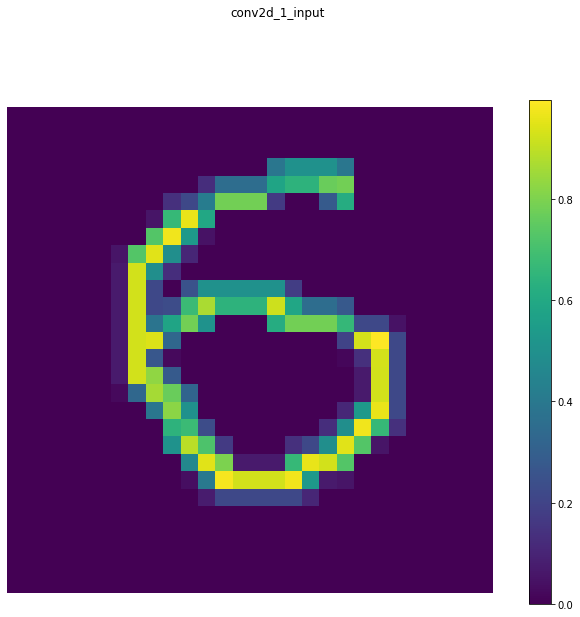

conv2d_1 (1, 26, 26, 32) 


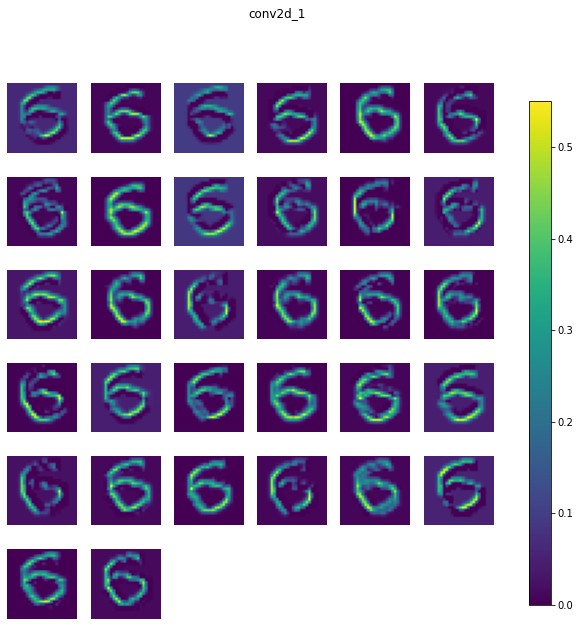

conv2d_2 (1, 24, 24, 64) 


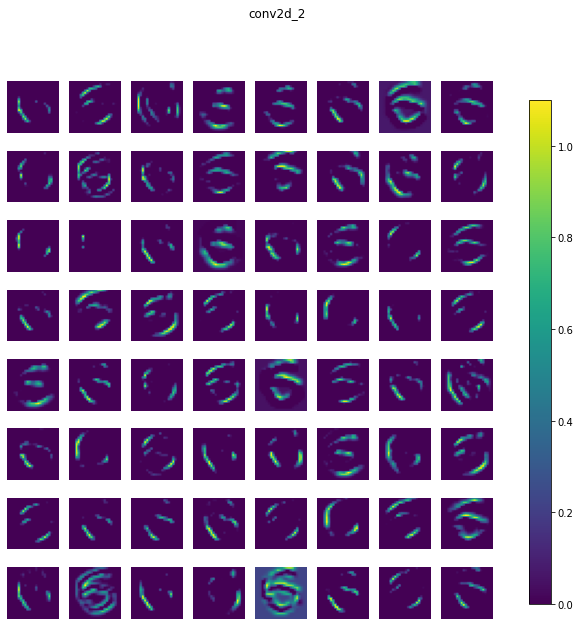

max_pooling2d_1 (1, 12, 12, 64) 


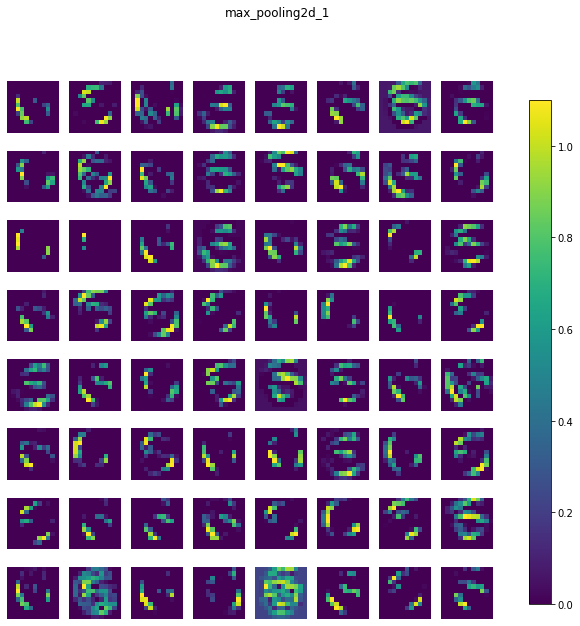

dropout_1 (1, 12, 12, 64) 


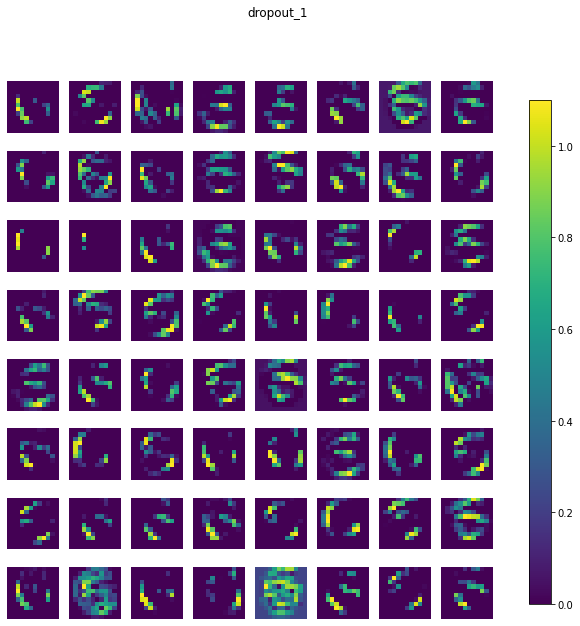

flatten_1 (1, 9216) 


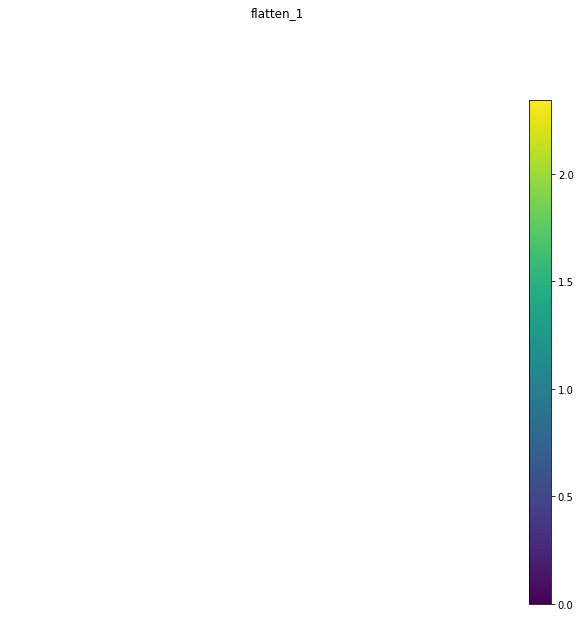

dense_1 (1, 128) 


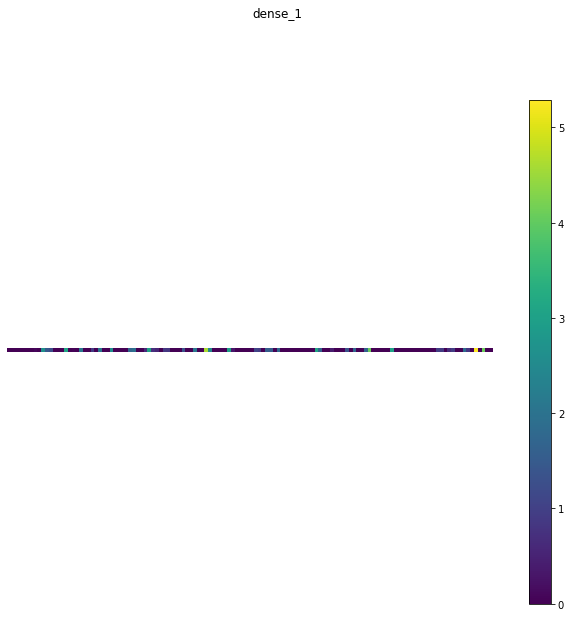

dropout_2 (1, 128) 


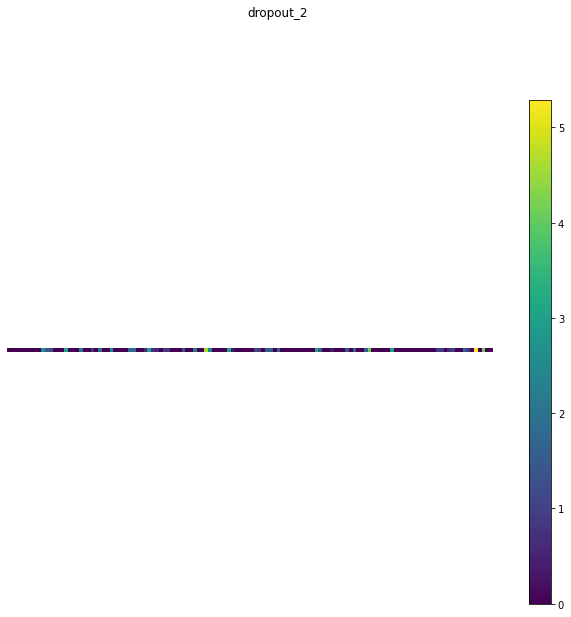

dense_2 (1, 10) 


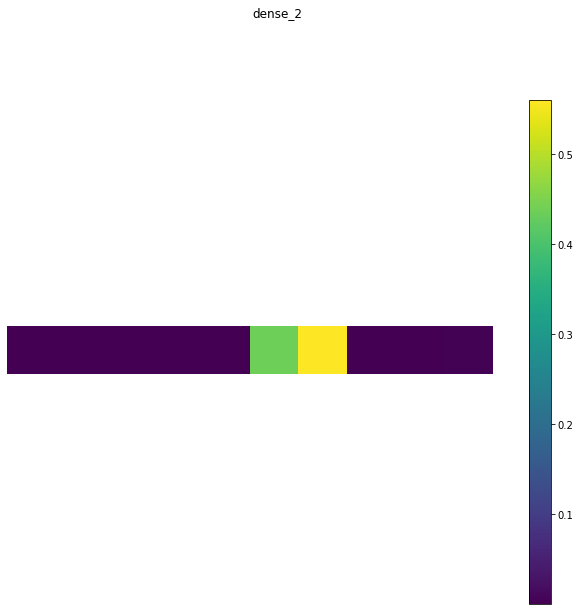

In [ ]:
#графическое изображения выводов слоёв
keract.display_activations(activations, cmap=None, save=False, directory='.', 
                           data_format='channels_last', fig_size=(10, 10), reshape_1d_layers=False)


# Квантизация модели


In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)
assert float(tf.__version__[:3]) >= 2.3
#данные из MNIST для оценки точности квантизованной модели
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_trainF = x_train.astype('float32')
x_testF = x_test.astype('float32')

x_test_uint8=x_test.astype(np.int8)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

coeff=np.int8(255)
print(coeff.dtype)
print(x_test_uint8.dtype)
x_test_uint8_2=np.zeros((10000,28,28,1),dtype=np.int8)
#x_test_uint8_2=x_test_uint8/coeff
np.divide(x_test_uint8, coeff, out=x_test_uint8_2, casting="unsafe")
print(x_test_uint8_2.dtype)
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test_uint8=y_test.astype(np.int8)

11501568/11490434 [==============================] - 0s 0us/step
int8
int8
int8
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Оценка точности модели:

In [61]:
float_loss, float_accuracy  = MyModel.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {float_loss:.5}')
print(f'Test accuracy: {float_accuracy:.5}')

Test loss: 0.029252
Test accuracy: 0.9907


In [ ]:
score = MyModel.evaluate(x_test, y_test, verbose=1)
print("Test loss {:.4f}, accuracy {:.2f}%".format(score[0], score[1] * 100))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 6ms/step - loss: 0.0293 - accuracy: 0.9907
Test loss 0.0293, accuracy 99.07%
Test loss: 0.02925346978008747
Test accuracy: 0.9907000064849854


# Fixed-point квантизация

In [ ]:
for layer in MyModel.layers:
    print(layer.name)
# считываем все веса и баесы каждого слоя и сохраняем в "словарь"
w_dict={}

w_dict['conv2d_1']=MyModel.get_layer('conv2d_1').get_weights() # [layer_x_weights, layer_x_bias] 
w_dict['conv2d_2']=MyModel.get_layer('conv2d_2').get_weights()
w_dict['dense_1']=MyModel.get_layer('dense_1').get_weights()
w_dict['dense_2']=MyModel.get_layer('dense_2').get_weights()

    #вывести среднее и стандартное отклонения от весов и баесов
    #print('{} (weights):\tmean = {}\tstd = {}'.format(layer.name, np.mean(w_dict[layer.name][0]), np.std(w_dict[layer.name][0])))
    #print('{} (bias):\t\tmean = {}\tstd = {}\n'.format(layer.name, np.mean(w_dict[layer.name][1]), np.std(w_dict[layer.name][1])))

conv2d_1
conv2d_2
max_pooling2d_1
dropout_1
flatten_1
dense_1
dropout_2
dense_2
<built-in method values of dict object at 0x7f78c7df2230>


In [85]:
from fxpmath import Fxp

fxp_ref = Fxp(None, dtype='fxp-s7/5')

Конвертируем все веса в fixed-point:

In [86]:
w_fxp_dict = {}

for layer in w_dict.keys():
    w_fxp_dict[layer] = [
      Fxp(w_dict[layer][0], like=fxp_ref), 
      Fxp(w_dict[layer][1], like=fxp_ref),
      ]

In [ ]:
# show weights of layer_0 converted to fixed point
w_fxp_dict['conv2d_1'][0]

Обновляем веса и баесы модели fixed-point версией

In [87]:

#for 'conv2d_1', values in w_fxp_dict['conv2d_1']:
MyModel.get_layer('conv2d_1').set_weights(w_fxp_dict['conv2d_1'])
MyModel.get_layer('conv2d_2').set_weights(w_fxp_dict['conv2d_2'])
MyModel.get_layer('dense_1').set_weights(w_fxp_dict['dense_1'])
MyModel.get_layer('dense_2').set_weights(w_fxp_dict['dense_2'])

Оценим точность fixed-point модели

In [88]:
fxp_loss, fxp_accuracy  = MyModel.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {fxp_loss:.6}')
print(f'Test accuracy: {fxp_accuracy:.6}')

Test loss: 0.203449
Test accuracy: 0.9869


Падение точнсти vs fixed-point длина дроби:

In [89]:
n_frac_vals = np.arange(0, 16)
n_int = 1

fxp_loss_vals = []
fxp_acc_vals = []

for n_frac in n_frac_vals:
    fxp_ref = Fxp(None, signed=True, n_int=n_int, n_frac=n_frac)
    
    # convert floating point weights and bias to Fxp
    for layer, values in w_dict.items():
        
        MyModel.get_layer(layer).set_weights([
            Fxp(values[0], like=fxp_ref), 
            Fxp(values[1], like=fxp_ref),
            ])
    
    loss, accuracy  = MyModel.evaluate(x_test, y_test, verbose=False)
    print('{}:\tloss = {:.5}\tacc = {:.5}'.format(fxp_ref.dtype, loss, accuracy))

    fxp_loss_vals.append(loss)
    fxp_acc_vals.append(accuracy)

fxp-s2/0:	loss = 2.3026	acc = 0.098
fxp-s3/1:	loss = 2.3026	acc = 0.098
fxp-s4/2:	loss = 2.3026	acc = 0.098
fxp-s5/3:	loss = 2.3026	acc = 0.098
fxp-s6/4:	loss = 2.0345	acc = 0.7679
fxp-s7/5:	loss = 0.20345	acc = 0.9869
fxp-s8/6:	loss = 0.042302	acc = 0.9903
fxp-s9/7:	loss = 0.030713	acc = 0.9905
fxp-s10/8:	loss = 0.029435	acc = 0.9907
fxp-s11/9:	loss = 0.029177	acc = 0.9908
fxp-s12/10:	loss = 0.029212	acc = 0.9907
fxp-s13/11:	loss = 0.029233	acc = 0.9907
fxp-s14/12:	loss = 0.029248	acc = 0.9907
fxp-s15/13:	loss = 0.029249	acc = 0.9907
fxp-s16/14:	loss = 0.029251	acc = 0.9907
fxp-s17/15:	loss = 0.029252	acc = 0.9907


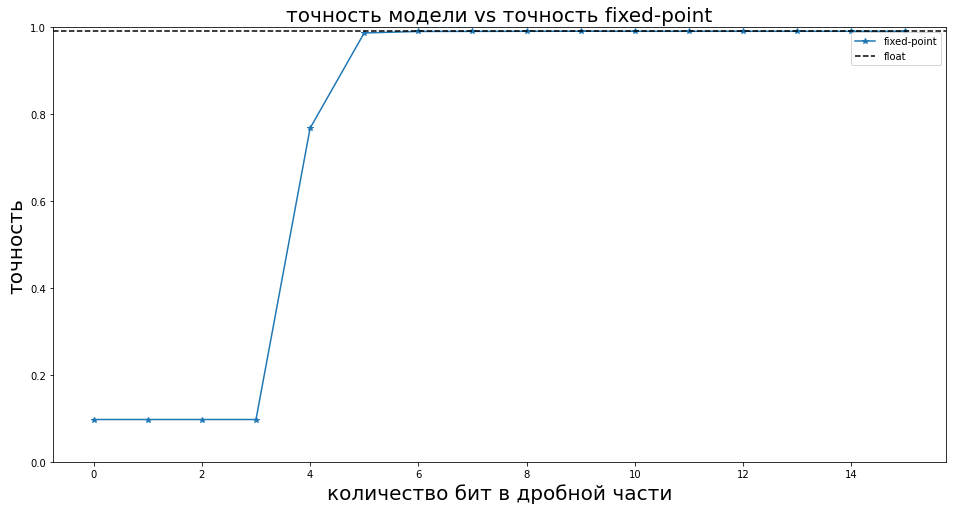

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
plt.plot(fxp_acc_vals, marker='*', label='fixed-point')
ax.axhline(float_accuracy, color='k', linestyle='--', label='float')
plt.title('точность модели vs точность fixed-point',fontsize=20)
plt.ylabel('точность',fontsize=20)
plt.xlabel('количество бит в дробной части',fontsize=20)
plt.legend()
plt.ylim([0, 1])
plt.show()

Сохраняем fixed-point кернелы и баесы

In [69]:
print(w_fxp_dict['conv2d_1'][0].shape)

(3, 3, 1, 32)


# UINT8 модель

In [ ]:
MyModel.save("model_quant.h5")
print("Model saved\n")

#модель бещ квантизации
model_quant=tf.keras.models.load_model('model_quant.h5')
converter=tf.lite.TFLiteConverter.from_keras_model(model_quant)
model_converted=converter.convert()
##сохраняем неконвертированную модель
open("converted_model.tflite", "wb").write(model_converted)

#REPRESENTATIVE DATASET
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
    yield [input_value]

def representative_data_gen2():
  for input_value in tf.data.Dataset.from_tensor_slices(x_test).batch(1).take(100):
    yield [input_value]


#модель с квантизацией
model_quant=tf.keras.models.load_model('model_quant.h5')
converter=tf.lite.TFLiteConverter.from_keras_model(model_quant)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
model_quant_converted = converter.convert()

##сохраняем конвертированную модель
open("converted_quant_model.tflite", "wb").write(model_quant_converted)
## Проверяем input/output details

#оценим точность модели
##загружаем TFLite модель 
interpreter= \
tf.lite.Interpreter(model_path="converted_quant_model.tflite")
interpreter.allocate_tensors()
##получаем входной и выходной тензор
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()
print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print("quantization_parameters:", input_details[0]['quantization_parameters'])
print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])
print("quantization_parameters:", output_details[0]['quantization_parameters'])
##тестируем квантизованную модель
input_shape=input_details[0]['shape']
acc=0
for i in range(len(x_test_uint8_2)):
    input_data=x_test_uint8_2[i].reshape(input_shape)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data=interpreter.get_tensor(output_details[0]['index'])
    if(np.argmax(output_data)==np.argmax(y_test_uint8[i])):
      acc+=1
acc=acc/len(x_test_uint8_2)
print(acc*100,'\n')

Model saved

INFO:tensorflow:Assets written to: /tmp/tmpx996hsak/assets


INFO:tensorflow:Assets written to: /tmp/tmpdwr77nqi/assets


INFO:tensorflow:Assets written to: /tmp/tmpdwr77nqi/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


== Input details ==
name: serving_default_conv2d_1_input:0
shape: [ 1 28 28  1]
type: <class 'numpy.int8'>
quantization_parameters: {'scales': array([0.00392157], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}

== Output details ==
name: StatefulPartitionedCall:0
shape: [ 1 10]
type: <class 'numpy.int8'>
quantization_parameters: {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}


KeyboardInterrupt: ignored

#

In [ ]:
MyModel.save("model_quant.h5")
print("Model saved\n")

#модель бещ квантизации
model_quant=tf.keras.models.load_model('model_quant.h5')
converter=tf.lite.TFLiteConverter.from_keras_model(model_quant)
model_converted=converter.convert()
##сохраняем неконвертированную модель
open("converted_model.tflite", "wb").write(model_converted)

#модель с квантизацией
model_quant=tf.keras.models.load_model('model_quant.h5')
converter=tf.lite.TFLiteConverter.from_keras_model(model_quant)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.uint32]
converter.inference_input_type = tf.int32  # or tf.uint8
converter.inference_output_type = tf.int32  # or tf.uint8
model_quant_converted=converter.convert()
##сохраняем конвертированную модель
open("converted_quant_model.tflite", "wb").write(model_quant_converted)

#оценим степень сжатия модели
import os
print("Float model in Mb:", os.path.getsize('converted_model.tflite')/float(2**20),"\n")
print("Quantized model in Mb:", os.path.getsize('converted_quant_model.tflite')/float(2**20),"\n")
print("Compression ratio:", os.path.getsize("converted_model.tflite")/os.path.getsize("converted_quant_model.tflite"),'\n')

#оценим точность модели
##загружаем TFLite модель 
interpreter= \
tf.lite.Interpreter(model_path="converted_quant_model.tflite")
interpreter.allocate_tensors()
##получаем входной и выходной тензор
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()
print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])
##тестируем квантизованную модель
input_shape=input_details[0]['shape']
acc=0
for i in range(len(x_testF)):
    input_data=x_testF[i].reshape(input_shape)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data=interpreter.get_tensor(output_details[0]['index'])
    if(np.argmax(output_data)==np.argmax(y_test[i])):
      acc+=1
acc=acc/len(x_testF)
print(acc*100,'\n')

# Извлекаем веса из квантизованной сети

In [ ]:
#Create interpreter, allocate tensors
tflite_interpreter = tf.lite.Interpreter(model_path='/content/converted_quant_model.tflite')
tflite_interpreter.allocate_tensors()


#Check input/output details
input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

# Проверяем input/output details
print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])



